In [28]:
import pandas as pd
import numpy as np

# File to Load (Remember to Change These)
file_to_load = "revenue/movie_budget.csv"

inflation = "revenue/inflation.csv"

#micheal_movies = 'clean_mov_metadata_mr.csv'

In [29]:
# Read Purchasing File and store into Pandas data frame
raw_data = pd.read_csv(file_to_load)
raw_data

,movie_id,title,year,trivia,mpaa,release_date,run_time,distributor,director,writer,...,main_actor_4,budget,domestic,international,worldwide,genre_1,genre_2,genre_3,genre_4,html
0,tt0099088,Back to the Future Part III,1990,"Stranded in 1955, Marty McFly learns about the...",NaN,25-May,1 hr 58 min,Universal Pictures,Robert Zemeckis,Robert Zemeckis,...,Thomas F. Wilson,40000000,88277583.0,157866667.0,246144250.0,Adventure,Comedy,Sci-Fi,Western,https://www.boxofficemojo.com/title/tt0099088/...
1,tt0099165,The Bonfire of the Vanities,1990,"After his mistress runs over a young teen, a W...",R,22-Dec,2 hr 5 min,Warner Bros.,Brian De Palma,Michael Cristofer,...,Kim Cattrall,47000000,15691192.0,NaN,15691192.0,Comedy,Drama,Romance,NaN,https://www.boxofficemojo.com/title/tt0099165/...
2,tt0099348,Dances with Wolves,1990,"Lieutenant John Dunbar, assigned to a remote w...",NaN,9-Nov,3 hr 1 min,Orion Pictures,Kevin Costner,Michael Blake,...,Rodney A. Grant,22000000,184208848.0,240000000.0,424208848.0,Adventure,Drama,Western,NaN,https://www.boxofficemojo.com/title/tt0099348/...
3,tt0099422,Dick Tracy,1990,The comic strip detective finds his life vastl...,NaN,15-Jun,1 hr 45 min,Walt Disney Studios Motion Pictures,Warren Beatty,Chester Gould,...,Charlie Korsmo,47000000,103738726.0,59000000.0,162738726.0,Action,Comedy,Crime,Music,https://www.boxofficemojo.com/title/tt0099422/...
4,tt0099423,Die Hard 2,1990,John McClane attempts to avert disaster as rog...,NaN,6-Jul,2 hr 4 min,Twentieth Century Fox,Renny Harlin,Walter Wager,...,Reginald VelJohnson,70000000,117540947.0,122706486.0,240247433.0,Action,Thriller,NaN,NaN,https://www.boxofficemojo.com/title/tt0099423/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,tt8772262,Midsommar,2019,A couple travels to Sweden to visit a rural ho...,R,3-Jul,2 hr 28 min,A24,Ari Aster,Ari Aster,...,William Jackson Harper,9000000,27426361.0,19463936.0,46890297.0,Drama,Horror,Mystery,Thriller,https://www.boxofficemojo.com/title/tt8772262/...
3239,tt8946378,Knives Out,2019,A detective investigates the death of a patria...,PG-13,21-Nov,2 hr 11 min,Lionsgate,Rian Johnson,Rian Johnson,...,Jamie Lee Curtis,40000000,165363234.0,143869563.0,309232797.0,Comedy,Crime,Drama,Mystery,https://www.boxofficemojo.com/title/tt8946378/...
3240,tt9024106,Unplanned,2019,All Abby Johnson ever wanted to do was help wo...,R,29-Mar,1 hr 49 min,Pure Flix Entertainment,Chuck Konzelman,Abby Johnson,...,Jared Lotz,6000000,19005109.0,2046806.0,21051915.0,Biography,Drama,NaN,NaN,https://www.boxofficemojo.com/title/tt9024106/...
3241,tt9134216,Playing with Fire,2019,A crew of rugged firefighters meet their match...,PG,7-Nov,1 hr 36 min,Paramount Pictures,Andy Fickman,Dan Ewen,...,Tyler Mane,29900000,44451847.0,24179822.0,68631669.0,Comedy,Family,NaN,NaN,https://www.boxofficemojo.com/title/tt9134216/...


In [30]:
clean_data = raw_data[['title', 'year', 'release_date', 'mpaa', 'writer', 'composer', 'cinematographer', 'main_actor_1', 'main_actor_2', 'main_actor_3', 'main_actor_4', 'budget','domestic', 'international', 'worldwide', 'genre_1', 'genre_2', 'genre_3', 'genre_4']]
clean_data.head()                      

,title,year,release_date,mpaa,writer,composer,cinematographer,main_actor_1,main_actor_2,main_actor_3,main_actor_4,budget,domestic,international,worldwide,genre_1,genre_2,genre_3,genre_4
0,Back to the Future Part III,1990,25-May,NaN,Robert Zemeckis,Alan Silvestri,Dean Cundey,Michael J. Fox,Christopher Lloyd,Mary Steenburgen,Thomas F. Wilson,40000000,88277583.0,157866667.0,246144250.0,Adventure,Comedy,Sci-Fi,Western
1,The Bonfire of the Vanities,1990,22-Dec,R,Michael Cristofer,Dave Grusin,Vilmos Zsigmond,Tom Hanks,Bruce Willis,Melanie Griffith,Kim Cattrall,47000000,15691192.0,NaN,15691192.0,Comedy,Drama,Romance,NaN
2,Dances with Wolves,1990,9-Nov,NaN,Michael Blake,John Barry,Dean Semler,Kevin Costner,Mary McDonnell,Graham Greene,Rodney A. Grant,22000000,184208848.0,240000000.0,424208848.0,Adventure,Drama,Western,NaN
3,Dick Tracy,1990,15-Jun,NaN,Chester Gould,Danny Elfman,Vittorio Storaro,Warren Beatty,Madonna,Al Pacino,Charlie Korsmo,47000000,103738726.0,59000000.0,162738726.0,Action,Comedy,Crime,Music
4,Die Hard 2,1990,6-Jul,NaN,Walter Wager,Michael Kamen,Oliver Wood,Bruce Willis,William Atherton,Bonnie Bedelia,Reginald VelJohnson,70000000,117540947.0,122706486.0,240247433.0,Action,Thriller,NaN,NaN


In [31]:
movie_data = clean_data.dropna()
movie_data.dtypes

title               object
year                 int64
release_date        object
mpaa                object
writer              object
composer            object
cinematographer     object
main_actor_1        object
main_actor_2        object
main_actor_3        object
main_actor_4        object
budget               int64
domestic           float64
international      float64
worldwide          float64
genre_1             object
genre_2             object
genre_3             object
genre_4             object
dtype: object

In [32]:
inflation_mult = pd.read_csv(inflation)
inflation_mult

inflation_mult["multiplier"]=inflation_mult["multiplier"] +1
inflation_mult

KeyError: 'multiplier'

In [33]:
#inflation_clean = inflation_mult.dropna(axis=1)
#inflation_clean

inflation_clean = inflation_mult[["year", "multiplier"]]
inflation_clean

inflation_cleaner = inflation_clean.dropna()
inflation_cleaner



#inflation_cleaner - use tonumeric, if it's a string that can't be converted, use string.replace to replace a pe

KeyError: "['multiplier'] not in index"

In [34]:
#empty lists
titles = []

budgets = []
adjusted_budgets = []

domestics = []
adjusted_domestics = []

internationals = []
adjusted_internationals = []

worldwides = []
adjusted_worldwides = []

#budget
i = 0

for year in inflation_cleaner["year"]:
    year_movie = movie_data.loc[movie_data["year"] == year,:]
    for budget in year_movie['budget']:
        adjusted_budget=budget*inflation_cleaner.iloc[i,1]
        budgets.append(budget)
        adjusted_budgets.append(adjusted_budget)
    i+=1
#domestic
i = 0

for year in inflation_cleaner["year"]:
    year_movie = movie_data.loc[movie_data["year"] == year,:]
    for domestic in year_movie['domestic']:
        adjusted_domestic=domestic*inflation_cleaner.iloc[i,1]
        domestics.append(domestic)
        adjusted_domestics.append(adjusted_domestic)
    i+=1
#international
i=0

for year in inflation_cleaner["year"]:
    year_movie = movie_data.loc[movie_data["year"] == year,:]
    for international in year_movie['international']:
        adjusted_international=international*inflation_cleaner.iloc[i,1]
        internationals.append(international)
        adjusted_internationals.append(adjusted_international)
    i+=1

#worldwide
i=0 
for year in inflation_cleaner["year"]:
    year_movie = movie_data.loc[movie_data["year"] == year,:]
    for worldwide in year_movie['worldwide']:
        adjusted_worldwide=worldwide*inflation_cleaner.iloc[i,1]
        worldwides.append(worldwide)
        adjusted_worldwides.append(adjusted_worldwide)
    i+=1
i=0
for year in inflation_cleaner["year"]:
    year_movie = movie_data.loc[movie_data["year"] == year,:]
    for title in year_movie['title']:
        titles.append(title)
        

#if movie_data.loc["year"] in inflation_cleaner.loc["year"]
       # multiplier = inflation_cleaner[row.loc["year"]]
            #print(year_movie[f'{movie}'])
print(adjusted_worldwides)

NameError: name 'inflation_cleaner' is not defined

In [35]:
adjusted_df = pd.DataFrame({"Title":titles, 
                             "Adjusted Budget":adjusted_budgets, 
                             "Adjusted Domestic":adjusted_domestics, 
                             "Adjusted International":adjusted_internationals, 
                             "Adjusted Worldwide":adjusted_worldwides})
adjusted_df.head()


,Title,Adjusted Budget,Adjusted Domestic,Adjusted International,Adjusted Worldwide


In [36]:
#if loc["year"] = 1990:
#if the value of the year column = the key of the inflation multiplier dictionary, then multiply the value in column ""
#budget" "domestic", "international", "worldwide" by the value in the dictionary

#other option: instead of having a multiplier column, create a dictionary of inflation 
#use loc to locate (one is index) to locate specific values in a column 
#for loop if 

#for row in movie_data:
  # if row.loc["year"] in inflation_cleaner.loc["year"]
       # multiplier = inflation_cleaner[row.loc["year"]]

In [37]:
movie_data.head()

,title,year,release_date,mpaa,writer,composer,cinematographer,main_actor_1,main_actor_2,main_actor_3,main_actor_4,budget,domestic,international,worldwide,genre_1,genre_2,genre_3,genre_4
13,Lionheart,1990,11-Jan,R,S.N. Warren,John Scott,Robert C. New,Jean-Claude Van Damme,Harrison Page,Deborah Rennard,Lisa Pelikan,6000000,24078196.0,193000.0,24271196.0,Action,Crime,Drama,Sport
74,Far and Away,1992,22-May,PG-13,Bob Dolman,John Williams,Mikael Salomon,Tom Cruise,Nicole Kidman,Thomas Gibson,Robert Prosky,60000000,58883840.0,78900000.0,137783840.0,Adventure,Drama,Romance,Western
79,A League of Their Own,1992,1-Jul,PG,Kim Wilson,Hans Zimmer,Miroslav Ondrícek,Tom Hanks,Geena Davis,Lori Petty,Madonna,40000000,107533928.0,24906141.0,132440069.0,Comedy,Drama,Family,Sport
86,The People Under the Stairs,1991,1-Nov,R,Wes Craven,Don Peake,Sandi Sissel,Brandon Quintin Adams,Everett McGill,Wendy Robie,A.J. Langer,6000000,24204154.0,7143000.0,31347154.0,Comedy,Horror,Mystery,Thriller
100,Cool Runnings,1993,1-Oct,PG,Lynn Siefert,Hans Zimmer,Phedon Papamichael,John Candy,Leon,Doug E. Doug,Rawle D. Lewis,14000000,68856263.0,86000000.0,154856263.0,Adventure,Comedy,Family,History


In [40]:
genre2 = clean_data.groupby("genre_2").sum()
genre3 = clean_data.groupby("genre_3").sum()
genre4 = clean_data.groupby("genre_4").sum()

,year,budget,domestic,international,worldwide
genre_4,,,,,
Comedy,34164,1392750000,1.756615e+09,2.818649e+09,4.575264e+09
Crime,42143,1251000000,1.604892e+09,1.758113e+09,3.363005e+09
Drama,74270,2237000000,2.486295e+09,3.591139e+09,6.077434e+09
Family,321364,13439300000,1.945804e+10,3.002334e+10,4.948138e+10
Fantasy,196800,8248450000,9.377975e+09,1.397119e+10,2.334916e+10
History,72264,2122100000,1.219093e+09,1.768305e+09,2.987398e+09
Horror,46225,1020450000,7.726815e+08,1.242254e+09,2.014936e+09
Music,38143,521000000,1.216616e+09,1.020583e+09,2.237199e+09
Musical,46170,1099500000,1.874540e+09,2.595240e+09,4.469780e+09


In [45]:
add1 = genre_df.add(genre2, fill_value=0)
add2 = add1.add(genre3, fill_value=0) 
add3 = add2.add(genre4, fill_value=0)
add3


,year,budget,domestic,international,worldwide
Action,915885.0,3.474005e+10,4.000495e+10,5.976464e+10,9.976959e+10
Adventure,1134924.0,5.616032e+10,6.806665e+10,1.139966e+11,1.820632e+11
Animation,369626.0,1.598355e+10,2.279249e+10,3.599764e+10,5.879013e+10
Biography,178770.0,3.723000e+09,3.858577e+09,3.868726e+09,7.727303e+09
Comedy,1100193.0,3.224080e+10,4.440026e+10,5.678852e+10,1.011888e+11
Crime,912887.0,1.833725e+10,2.199376e+10,2.252654e+10,4.452030e+10
Documentary,36108.0,9.889522e+07,4.140241e+08,1.348238e+08,5.488479e+08
Drama,2317431.0,4.273762e+10,5.323930e+10,6.039716e+10,1.136365e+11
Family,837096.0,2.932926e+10,3.988331e+10,5.598190e+10,9.586521e+10
Fantasy,726772.0,2.770468e+10,3.339089e+10,5.122770e+10,8.461859e+10


<AxesSubplot:>

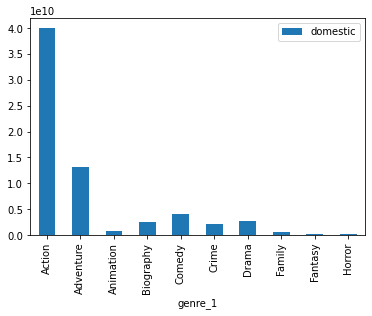

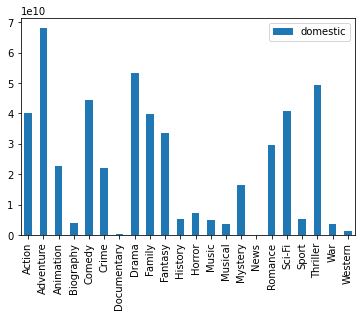

In [47]:
genre = movie_data.groupby("genre_1")
sumgenre = genre.sum()
genre_df = pd.DataFrame(sumgenre)
genre_df.reset_index()

genre_df.plot.bar(y="domestic")
add3.plot.bar(y="domestic")